In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
import time

In [2]:
#import CSV

In [3]:
df=pd.read_csv('Pasta.csv')
print(df)

                      datetime  safeLow  average  fast  fastest
0   2021-06-17 00:27:51.975508     15.3     15.3    16       21
1   2021-06-17 17:02:53.047725     17.0     17.0    38       40
2   2021-06-17 17:02:54.629253     17.0     17.0    38       40
3   2021-06-17 18:02:55.955438     13.0     13.0    28       29
4   2021-06-17 19:02:28.719364      1.0      1.0    27       29
..                         ...      ...      ...   ...      ...
76  2021-06-20 17:03:36.804628      1.0      1.0     9       10
77  2021-06-20 18:02:59.836846      5.0      5.0    11       11
78  2021-06-20 19:02:26.583970      5.0      5.0     8       10
79  2021-06-20 20:02:44.694421     35.0     35.0    55       55
80  2021-06-20 21:02:16.072121     10.0     10.0    48       55

[81 rows x 5 columns]


In [4]:
#convert to strptime

In [5]:
def timed(x):
    return datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S.%f")
df['datetime']=df.datetime.apply(timed)

In [6]:
#grab hour out of DateTime value

In [7]:
def houred(x):
    return x.hour
df['datetime']=df.datetime.apply(houred)
print(df.head())

   datetime  safeLow  average  fast  fastest
0         0     15.3     15.3    16       21
1        17     17.0     17.0    38       40
2        17     17.0     17.0    38       40
3        18     13.0     13.0    28       29
4        19      1.0      1.0    27       29


In [8]:
#drop unecessary columns, rename necessary columns

In [9]:
df=df.drop(columns=['safeLow','fast','fastest'])
df.rename(columns={'datetime': 'hour', 'average': 'cost'}, inplace=True)
print(df.head())

   hour  cost
0     0  15.3
1    17  17.0
2    17  17.0
3    18  13.0
4    19   1.0


In [10]:
#plot Bargraph visualizing gas cost at each hour of the day

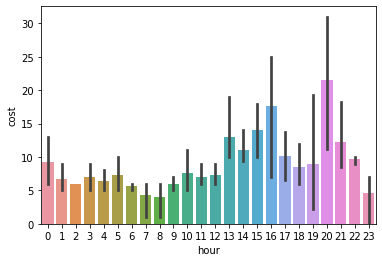

In [11]:
sns.barplot(data=df, x='hour', y='cost')
plt.show()

In [12]:
#create more easily readable DataFrame

In [13]:
df2=pd.DataFrame()

for hour in range(24):
    df2[str(hour)]=(df.groupby('hour').get_group(1)['cost'].values).tolist()
    df2.reset_index()
print(df2)

     0    1    2    3    4    5    6    7    8    9  ...   14   15   16   17  \
0  9.0  9.0  9.0  9.0  9.0  9.0  9.0  9.0  9.0  9.0  ...  9.0  9.0  9.0  9.0   
1  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  ...  6.0  6.0  6.0  6.0   
2  5.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0  ...  5.0  5.0  5.0  5.0   

    18   19   20   21   22   23  
0  9.0  9.0  9.0  9.0  9.0  9.0  
1  6.0  6.0  6.0  6.0  6.0  6.0  
2  5.0  5.0  5.0  5.0  5.0  5.0  

[3 rows x 24 columns]
